In [138]:
from pathlib import Path
import cartopy
import cartopy.crs as ccrs
import pyproj
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import salem

In [139]:
mpl.get_cachedir()

'/import/home/cwaigl/.cache/matplotlib'

In [2]:
import socket
hostname = socket.gethostname()

if hostname.lower().startswith('chinook'):
    fiboreal = "/import/AKCASC/"
else:
    fiboreal = "/Volumes/FIBOREAL/"

wrfdir =  Path("/import/beegfs/CMIP6/wrf_era5/") 
fiwepsdir = Path(fiboreal) / "fiweps_data"
era5dir = Path(fiboreal) / "cds"

hostname, fiboreal, wrfdir 

('chinook03.rcs.alaska.edu',
 '/import/AKCASC/',
 PosixPath('/import/beegfs/CMIP6/wrf_era5'))

In [3]:
datadir = wrfdir
datadir, "exists" if datadir.exists() else "doesn't exist"

(PosixPath('/import/beegfs/CMIP6/wrf_era5'), 'exists')

In [41]:
ds.HGT_M.shape

(1, 204, 264)

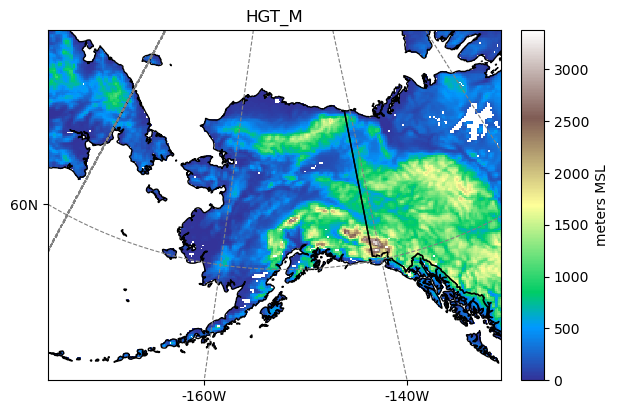

In [43]:
ds = salem.open_wrf_dataset(datadir / 'geo_em.d01.nc')

f, ax = plt.subplots()
mymap = ds.HGT_M.where(ds.LANDMASK).salem.quick_map(cmap='terrain', ax=ax)
mymap.set_data((ds.HGT_M.where(1-ds.LANDMASK)+1000), overplot=True)

{'imshow': <matplotlib.image.AxesImage at 0x7f46e2f900b0>,
 'contour': [],
 'contourf': []}

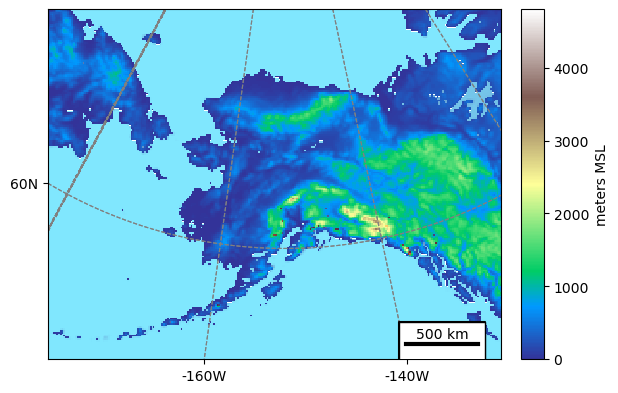

In [88]:
ds = salem.open_wrf_dataset(datadir / 'geo_em.d01.nc')

f, ax = plt.subplots()
smap = salem.Map(ds.salem.grid, countries=False)
smap.set_data(ds.HGT_M.where(ds.LANDMASK))  
smap.set_cmap('terrain')
smap.set_vmax(4800)
smap.visualize(ax=ax, cbar_title=ds.HGT_M.units)
smap_cold = salem.Map(ds.salem.grid, countries=False)
smap_cold.set_data(ds.HGT_M.where(1-ds.LANDMASK)+1000)
smap_cold.set_cmap('managua_r')
# smap_cold.set_shapefile(oceans=True, facecolor='blue')
# smap_cold.set_shapefile(lakes=True, facecolor='red')
smap_cold.set_scale_bar(location=(0.87, 0.045), add_bbox=True)
smap_cold.plot(ax=ax)

# f, ax = plt.subplots()
# mymap = ds.HGT_M.where(1-ds.LANDMASK).salem.quick_map(cmap='terrain', ax=ax)
# mymap.set_data(ds.HGT_M.where(1-ds.LANDMASK), overplot=True)

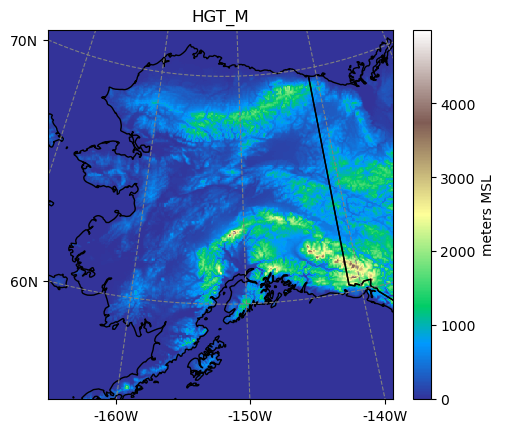

In [13]:
ds = salem.open_wrf_dataset(datadir / 'geo_em.d02.nc')
# ds.HGT_M.where(ds.LANDMASK).salem.quick_map(cmap='terrain')
ds.HGT_M.salem.quick_map(cmap='terrain')

In [140]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Nimbus Sans'] 


Text(0.5, 0.78, 'WRF domains: Outer domain (12 km) and inner domain (4 km)')

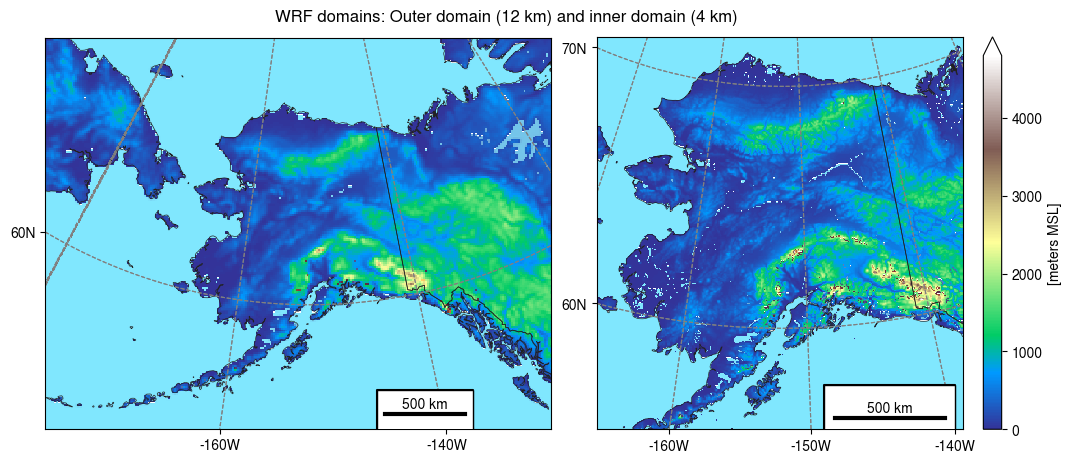

In [146]:
ds1 = salem.open_wrf_dataset(datadir / 'geo_em.d01.nc')
ds2 = salem.open_wrf_dataset(datadir / 'geo_em.d02.nc')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), width_ratios=[3, 2.4], layout='constrained')
smap = salem.Map(ds1.salem.grid, countries=False)
smap.set_data(ds1.HGT_M.where(ds1.LANDMASK))  
smap.set_cmap('terrain')
smap.set_vmax(4800)
smap.set_shapefile(countries=True, color='#222222', linewidths=0.5)
smap.visualize(ax=ax1, addcbar=False)
smap_cold = salem.Map(ds1.salem.grid, countries=False)
smap_cold.set_data(ds1.HGT_M.where(1-ds1.LANDMASK)+1000)
smap_cold.set_cmap('managua_r')
smap_cold.set_scale_bar(location=(0.75, 0.038), add_bbox=True)
smap_cold.plot(ax=ax1)

smap = salem.Map(ds2.salem.grid, countries=False)
smap.set_data(ds2.HGT_M.where(ds2.LANDMASK))  
smap.set_cmap('terrain')
smap.set_vmax(4800)
smap.set_shapefile(countries=True, color='#222222', linewidths=0.5)
smap.visualize(ax=ax2, cbar_title=f"[{ds1.HGT_M.units}]")
smap_cold = salem.Map(ds2.salem.grid, countries=False)
smap_cold.set_data(ds2.HGT_M.where(1-ds2.LANDMASK)+1000)
smap_cold.set_cmap('managua_r')
smap_cold.set_scale_bar(location=(0.8, 0.03), length=500000, add_bbox=True)
smap_cold.plot(ax=ax2)

f.suptitle("WRF domains: Outer domain (12 km) and inner domain (4 km)", y=.78)

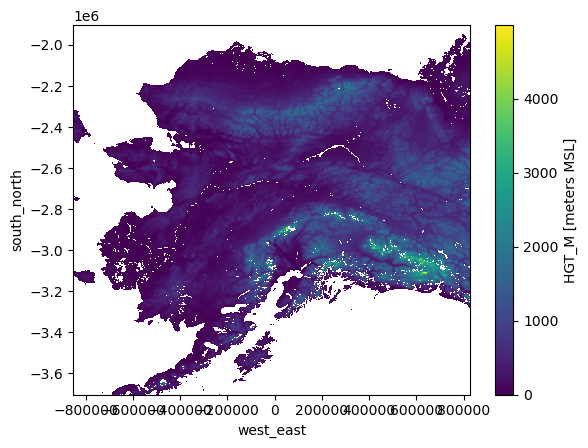

In [6]:
ds.HGT_M.where(ds.LANDMASK).plot()

In [ ]:
wrf_proj = pyproj.Proj(proj='stere', # projection type: Stereographic
                       lat_ts=ds.TRUELAT1, # not distorted
                       lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON, # Center point
                       a=6370000, b=6370000) # This is it! The Earth is a perfect sphere

In [ ]:
wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')
e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)
# Grid parameters
dx, dy = ds.DX, ds.DY
nx, ny = ds.dims['west_east'], ds.dims['south_north']
# Down left corner of the domain
x0 = -(nx-1) / 2. * dx + e
y0 = -(ny-1) / 2. * dy + n
# 2d grid
xx, yy = np.meshgrid(np.arange(nx) * dx + x0, np.arange(ny) * dy + y0)

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_49724/4207070889.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_49724/2909885457.py:2: UserWarning: "true_scale_latitude" parameter is only used for polar stereographic projections. Consider the use of "scale_factor" instead.
  stere = ccrs.Stereographic(globe=globe, # important!


Text(0.5, 1.0, 'Outer domain, dx = 12 km, land mask applied')

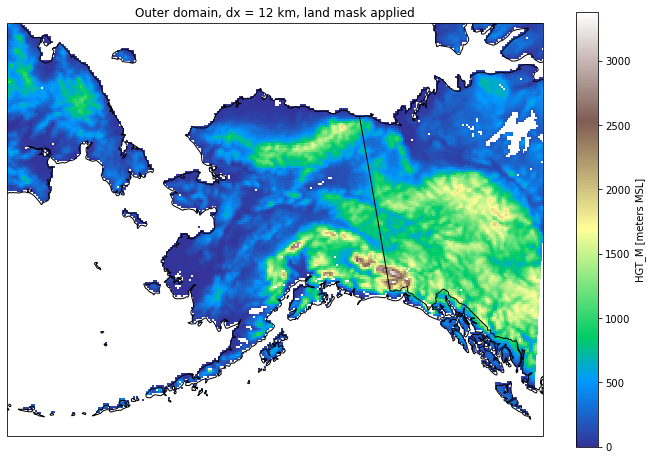

In [ ]:
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=6370000, semiminor_axis=6370000)
stere = ccrs.Stereographic(globe=globe, # important!
                            central_longitude=ds.STAND_LON, central_latitude=ds.MOAD_CEN_LAT,
                            true_scale_latitude=ds.TRUELAT1,
                            )
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=stere)
ds.HGT_M.where(ds.LANDMASK).plot(ax=ax, transform=ds.salem.cartopy(), cmap='terrain')
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.set_extent([xx.min(), xx.max(), yy.min(), yy.max()], crs=stere)
ax.set_title("Outer domain, dx = 12 km, land mask applied")